In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from allison.clustering import Kmeans

In [3]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['labels'] = data.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


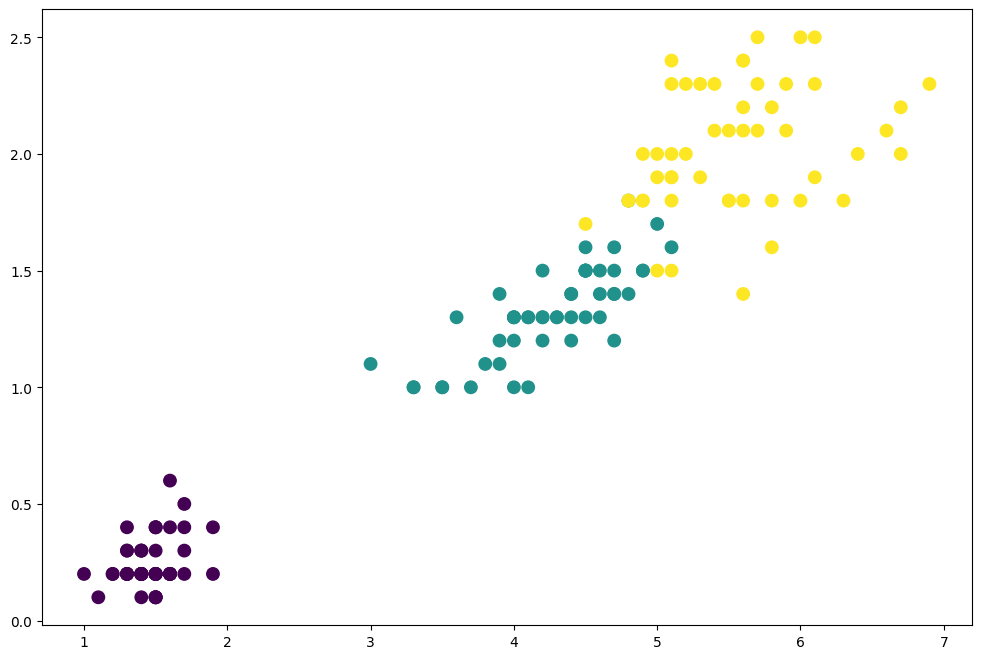

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=data['labels'])

In [6]:
X=data[['PetalLengthCm','PetalWidthCm','PetalLengthCm','PetalWidthCm']]
X

,PetalLengthCm,PetalWidthCm,PetalLengthCm,PetalWidthCm
0,1.4,0.2,1.4,0.2
1,1.4,0.2,1.4,0.2
2,1.3,0.2,1.3,0.2
3,1.5,0.2,1.5,0.2
4,1.4,0.2,1.4,0.2
...,...,...,...,...
145,5.2,2.3,5.2,2.3
146,5.0,1.9,5.0,1.9
147,5.2,2.0,5.2,2.0
148,5.4,2.3,5.4,2.3


In [7]:
model= Kmeans(n_centroids=3)
model.train(X,history_train=True)

Iter: 1 	 ==================================================> 	 moviment: 0.548
Iter: 2 	 ==================================================> 	 moviment: 0.204
Iter: 3 	 ==================================================> 	 moviment: 0.183
Iter: 4 	 ==================================================> 	 moviment: 0.042
Iter: 5 	 ==================================================> 	 moviment: 0.029
Iter: 6 	 ==================================================> 	 moviment: 0.043
Iter: 7 	 ==================================================> 	 moviment: 0.015
Iter: 8 	 ==================================================> 	 moviment: 0.000


In [8]:
model


        model: Kmeans 

        n_centroids: 3 

        

In [9]:
pred_labels = model.predict(X)

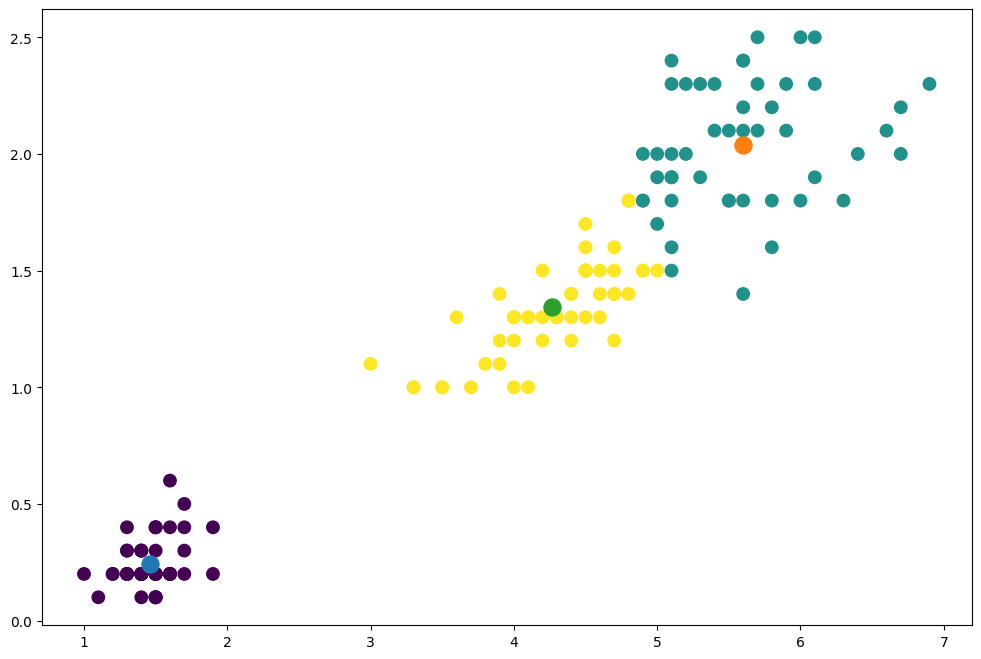

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

In [11]:
history=model.history_train
history

{0: array([[1.7, 0.3, 1.7, 0.3],
        [5. , 1.9, 5. , 1.9],
        [3. , 1.1, 3. , 1.1]]),
 1: array([[1.464     , 0.244     , 1.464     , 0.244     ],
        [5.14578313, 1.78674699, 5.14578313, 1.78674699],
        [3.73529412, 1.13529412, 3.73529412, 1.13529412]]),
 2: array([[1.464     , 0.244     , 1.464     , 0.244     ],
        [5.30571429, 1.87428571, 5.30571429, 1.87428571],
        [3.97333333, 1.21333333, 3.97333333, 1.21333333]]),
 3: array([[1.464     , 0.244     , 1.464     , 0.244     ],
        [5.47368421, 1.96842105, 5.47368421, 1.96842105],
        [4.15348837, 1.28837209, 4.15348837, 1.28837209]]),
 4: array([[1.464     , 0.244     , 1.464     , 0.244     ],
        [5.51481481, 1.99444444, 5.51481481, 1.99444444],
        [4.19130435, 1.30217391, 4.19130435, 1.30217391]]),
 5: array([[1.464     , 0.244     , 1.464     , 0.244     ],
        [5.53846154, 2.01346154, 5.53846154, 2.01346154],
        [4.22083333, 1.31041667, 4.22083333, 1.31041667]]),
 6: array(

# Kmeans Animation

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.centroids = history[i]
    pred_labels = model.predict(X)
    ax.scatter(data['PetalLengthCm'], data['PetalWidthCm'], s=80, c=pred_labels)

    for centroid in model.centroids:
        ax.scatter(centroid[0], centroid[1], s=150)


plt.close()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(history), repeat=False)
# Display the animation
HTML(ani.to_jshtml())

In [13]:
model.get_distances(X)

array([[0.10983624, 6.47787367, 4.36745969],
       [0.10983624, 6.47787367, 4.36745969],
       [0.2401333 , 6.60766075, 4.49915508],
       [0.080399  , 6.34858361, 4.23639137],
       [0.10983624, 6.47787367, 4.36745969],
       [0.40007999, 5.97644102, 3.87011383],
       [0.12026637, 6.42244869, 4.31714965],
       [0.080399  , 6.34858361, 4.23639137],
       [0.10983624, 6.47787367, 4.36745969],
       [0.20991427, 6.40776981, 4.29231114],
       [0.080399  , 6.34858361, 4.23639137],
       [0.20214846, 6.21982159, 4.10601017],
       [0.22285421, 6.53588917, 4.4217222 ],
       [0.55359191, 6.9233552 , 4.81401123],
       [0.37850231, 6.73791614, 4.63142405],
       [0.22641555, 6.23814988, 4.13680622],
       [0.32009998, 6.50162907, 4.40551362],
       [0.12026637, 6.42244869, 4.31714965],
       [0.34302187, 6.03264844, 3.92105906],
       [0.09414882, 6.29201986, 4.1845058 ],
       [0.33950552, 6.09162107, 3.97638369],
       [0.22641555, 6.23814988, 4.13680622],
       [0.

In [14]:
inertias = []

for i in range(2,11):
    model = Kmeans(n_centroids=i)
    model.train(X, history_train=False)
    inertias.append(model.get_inertia(X))

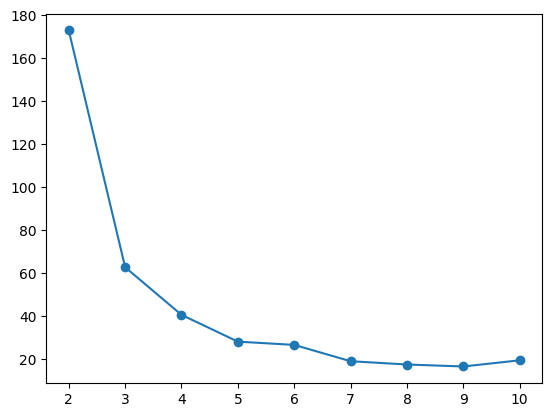

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), inertias, marker='o')